# Build model to predict survival of passengers on Titanic ship based on certain  parameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analysing Data

<AxesSubplot:xlabel='Pclass', ylabel='count'>

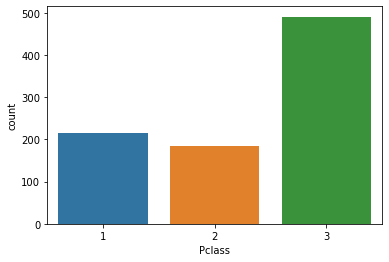

In [6]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

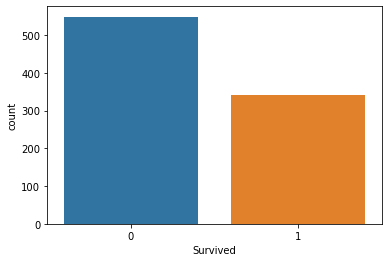

In [7]:
sns.countplot(x='Survived',data=df)

* 0 Represents not survived and 1 represents survived
* Those who could not survive(more than 500) are greater than those who survived(nearly 300)

<AxesSubplot:xlabel='Survived', ylabel='count'>

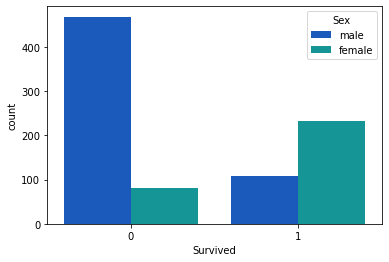

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='winter')
# Here hue parameter determines which column in df should be used for color encoding

* 0 Represents not survived and 1 represents survived
* Number of females Survived is more than twice of males survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

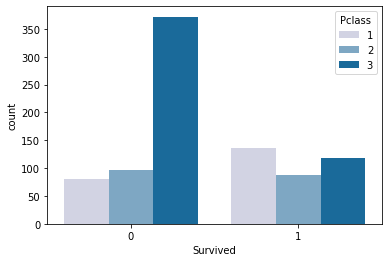

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='PuBu')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

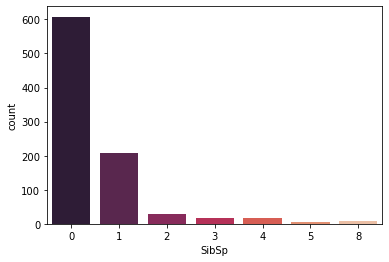

In [10]:
sns.countplot(x='SibSp',data=df,palette='rocket')

* We can see most of the passengers do not have thier siblings onboard
* Very few apssengers have more than 2 kids with them onboard

* Passenger who didn't survive are mostly from 3rd class(Low fare tickets)
* Passengers from 1st & 2nd are more likely to be rescued

<AxesSubplot:ylabel='Frequency'>

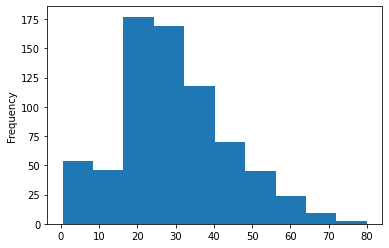

In [11]:
df['Age'].plot.hist()

* Most of the passengers are from 20-40 Age group 
* Very few passengers are in 70-80 Age group

<AxesSubplot:ylabel='Frequency'>

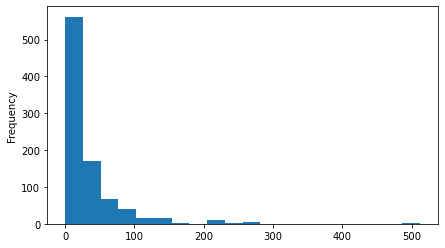

In [12]:
df['Fare'].plot.hist(bins=20,figsize=(7,4))

* We can see most of the tickets bought are under fare 100
* Very few have bought it on higher fare in range 220-500

### Data Wrangling

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

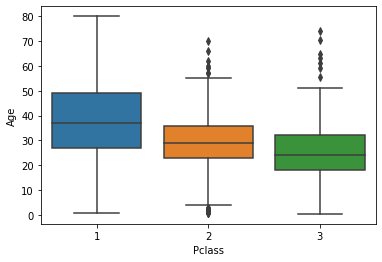

In [14]:
sns.boxplot(x='Pclass',y='Age',data=df)

* We can see older age group are travelling more in class 1 & 2 compared to class 3
* Class 2 and 3 has many outliers ie; extreme values but they are in each class not specific to one 

In [15]:
# We will drop few columns now
df.drop('Cabin',axis=1,inplace =True)

In [16]:
medAge=df['Age'].median()
medAge

28.0

In [17]:
df['Age'].fillna(medAge,inplace=True)

In [18]:
# Dropping all null values
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.shape

(889, 11)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:ylabel='Frequency'>

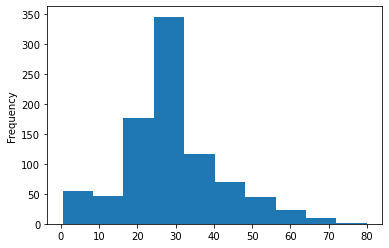

In [22]:
df['Age'].plot.hist()

In [23]:
# As machine learning algorithm only understands numbers not string we will assign no. to strings
# that we will be using in our logistic regression model
Sex=pd.get_dummies(df['Sex'],prefix='Sex',drop_first=True)
Sex.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [24]:
# As passenger class is just a class no significance of number so converting that in dummy
Pcl=pd.get_dummies(df.Pclass,prefix='Pclass',drop_first=True)
df=pd.concat([df,Sex,Pcl],axis=1)
df.head(3) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [25]:
# dropping unimportant columns which are not usefull to us
df.drop(['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,1,0,1


### Model training

In [26]:
y=df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
X=df.drop('Survived',axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [29]:
len(X_train)

666

In [30]:
len(X_test)

223

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [32]:
lm.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred=lm.predict(X_test)

In [34]:
lm.score(X_test,y_test)

0.8340807174887892

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       138
           1       0.77      0.80      0.79        85

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.83       223
weighted avg       0.84      0.83      0.83       223



Text(33.0, 0.5, 'truth')

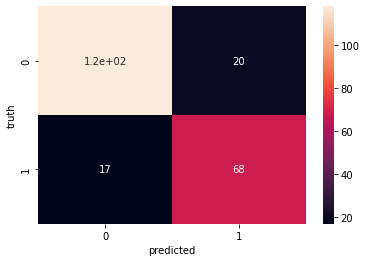

In [36]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

### Decision Tree Classifier

In [37]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [38]:
model = model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [39]:
model.score(X_test, y_test)           # Model accuracy

0.7802690582959642

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       138
           1       0.70      0.74      0.72        85

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



<AxesSubplot:>

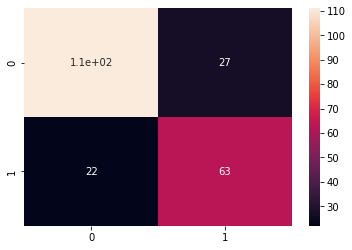

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

### From above two model Logistic Regression model gave us the best accuracy of 83.4%